In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\aryam\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data=pd.read_csv("1_Boston_housing.csv")

In [4]:
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.isnull().sum()


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [6]:
 x=data.drop('MEDV',axis=1)

In [7]:
 y=data['MEDV']


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
 scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128,input_shape = (13,),activation = 'relu',name='dense_1'))
model.add(Dense(64,activation = 'relu',name = 'dense_2'))
model.add(Dense(1,activation='linear',name='dense_output'))
model.compile(optimizer = 'adam',loss='mse',metrics=['mae'])
model.summary()

C:\Users\aryam\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_output (Dense)                 │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 621.8087 - mae: 23.2806 - val_loss: 521.8290 - val_mae: 21.0236
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 510.0536 - mae: 21.0472 - val_loss: 459.5153 - val_mae: 19.5552
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 463.7157 - mae: 19.5648 - val_loss: 379.8477 - val_mae: 17.6423
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 378.1077 - mae: 17.4455 - val_loss: 279.7922 - val_mae: 15.0070
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 276.8084 - mae: 14.4280 - val_loss: 176.0208 - val_mae: 11.7284
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 160.6006 - mae: 10.7680 - val_loss: 100.8633 - val_mae: 8.8028
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 102.0638 - mae: 8.1733 - val_loss: 69.5310 - val_mae: 6.6409
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 70.3642 - mae: 6.7174 - val_loss: 56.8060 - val_mae: 5.6579
Epoch 9/50
11/11 ━━━━━━━━━━━━━

In [23]:
mse,mae=model.evaluate(x_test,y_test)
print("mse:",mse)
print("mae:",mae)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.2996 - mae: 2.8337 
mse: 11.123528480529785
mae: 2.7524046897888184


In [24]:
 y_pred = model.predict(x_test[:])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [26]:
p=[]
for i in y_pred:
    p.append(list(i)[0])

In [27]:
d = pd.DataFrame({'actual':y_test,'predicted':p})
d


,actual,predicted
307,28.2,28.131657
343,23.9,22.643332
47,16.6,21.496380
67,22.0,24.034515
362,20.8,22.701843
...,...,...
92,22.9,24.381355
224,44.8,43.374435
110,21.7,20.955542
426,10.2,14.994939


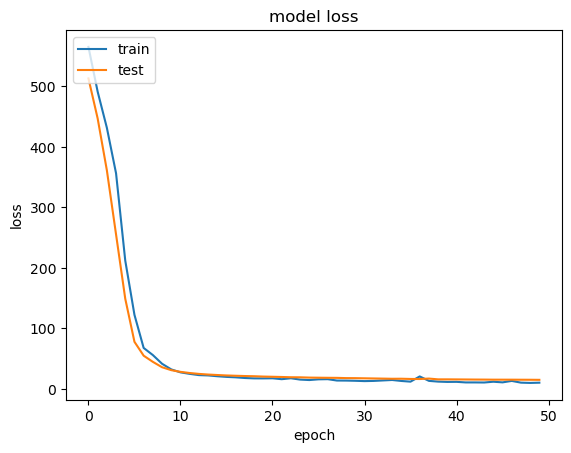

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
